<a href="https://colab.research.google.com/github/MouniriOuma/TAR-Social-Network-Ads-Purchase-Prediction/blob/main/TAR_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Partie 1: Chargement et Prétraitement des Données

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv("Social_Network.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Vérification de la présence des colonnes nécessaires

In [ ]:
colonnes_necessaires = ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

# Vérification de la présence de chaque colonne
colonnes_manquantes = [col for col in colonnes_necessaires if col not in df.columns]

if not colonnes_manquantes:
    print("Toutes les colonnes nécessaires sont présentes.")
else:
    print("Les colonnes manquantes sont :", colonnes_manquantes)

Toutes les colonnes nécessaires sont présentes.


Géstion des valeurs manquantes

In [ ]:
df.dropna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Séparation des données en features (X) et étiquettes (y)

In [ ]:
# Conversion de la colonne "Gender" en variables numériques
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
x = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']

Partie 2: Préparation de l'apprentissage

In [ ]:
#Division des données en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test)
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Partie 3: Préparation des données pour le modèle

In [ ]:
# Initialisation du scaler
scaler = StandardScaler()

# Normalisation des données d'entraînement
x_train_scaled = scaler.fit_transform(x_train)

# Application de la normalisation aux données de test (sans réajuster)
x_test_scaled = scaler.transform(x_test)

Partie 4: Apprentissage du modèle

In [ ]:
# Création du modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Entraînement du modèle sur les données d'entraînement
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Partie 5: Évaluation du modèle

In [ ]:
# Faire des prédictions sur les données de test
y_pred = model.predict(x_test_scaled)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)

# Afficher un rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle : 0.8875
Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



Partie 6: Visualisation des résultats

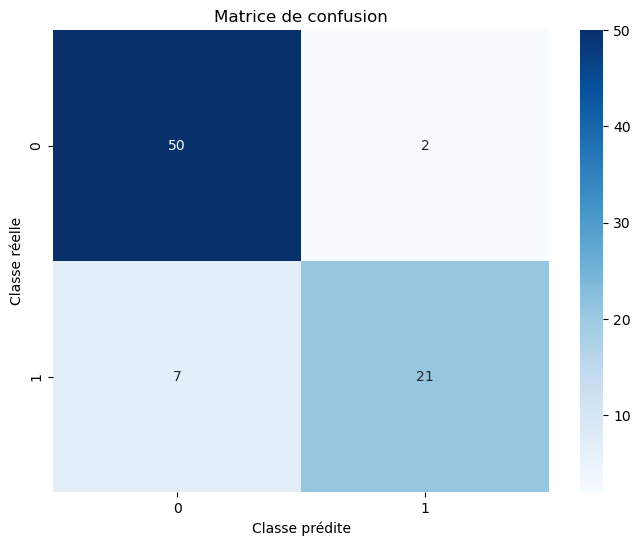

In [ ]:
# Calcul de la matrice de confusion
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()